Linear Regression anlatıldı

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [5]:
dataset_cols = ["bike_count","hour","temp","humidity","wind","visibility","dew_pt_temp","radiation","rain","snow","functional"]
df = pd.read_csv("./bike-dataset/SeoulBikeData.csv").drop(["Date","Holiday","Seasons"],axis=1)
df.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [6]:
df.columns =dataset_cols

In [7]:
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [8]:
df["functional"] = (df["functional"]=="Yes").astype(int)

In [9]:
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1


In [11]:
df =df[df["hour"]==12]
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,12,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,12,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,12,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,12,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,12,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


In [12]:
df =df.drop(["hour"],axis=1)
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


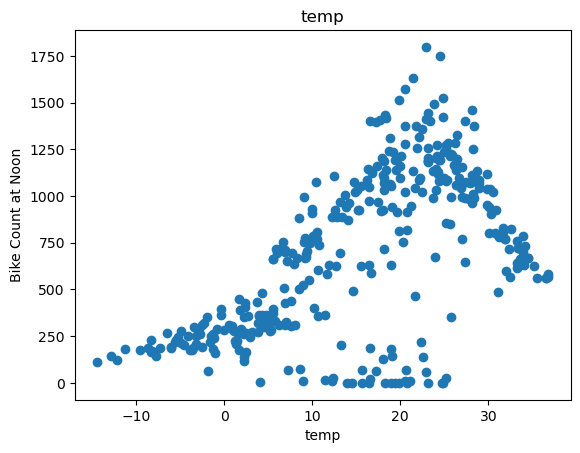

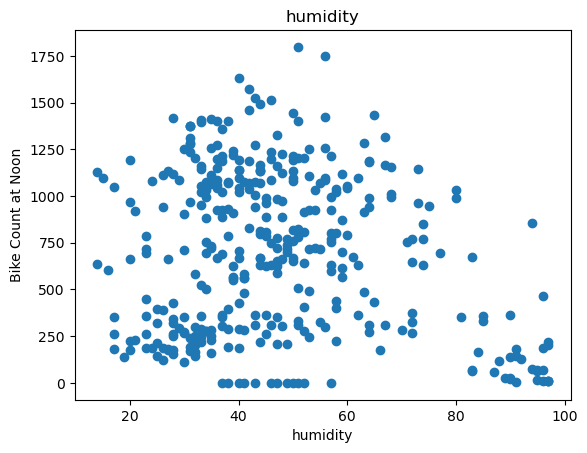

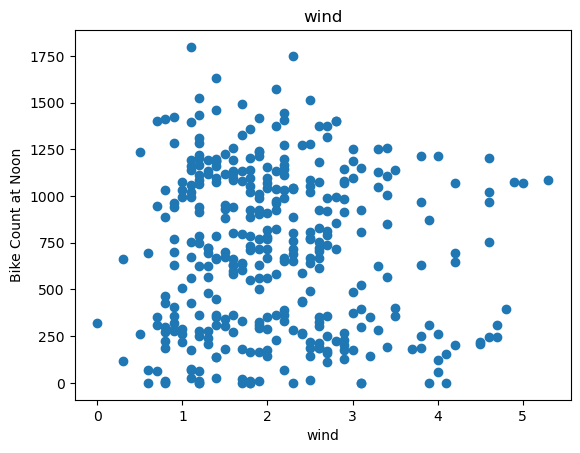

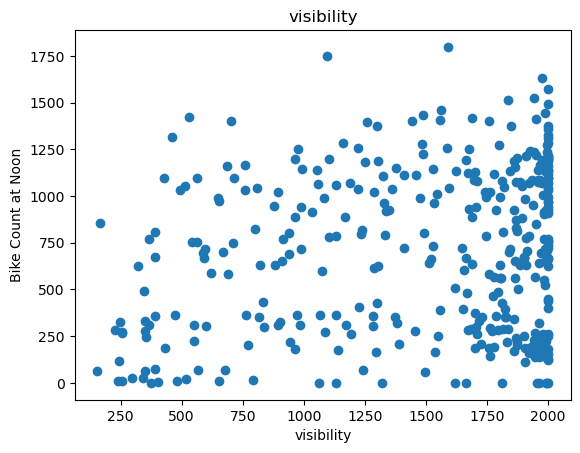

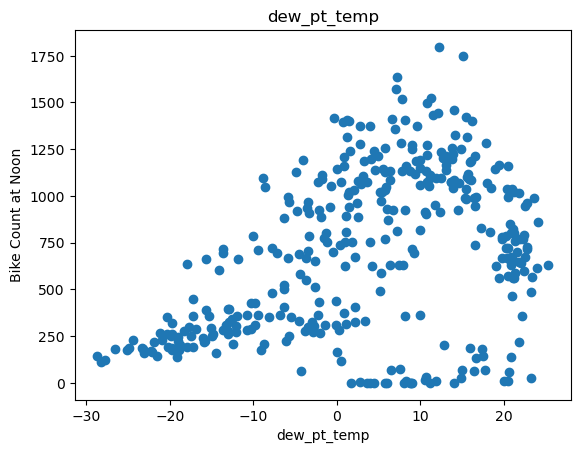

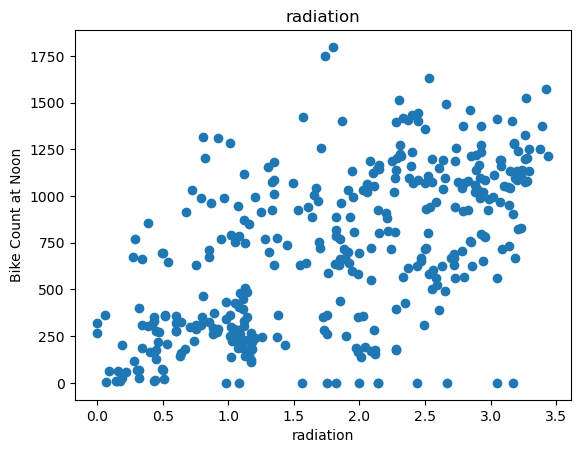

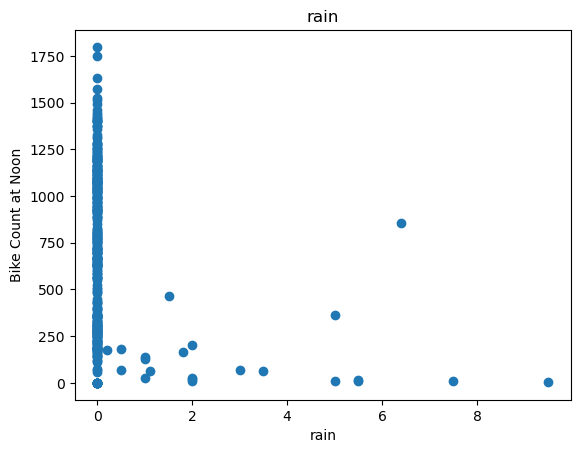

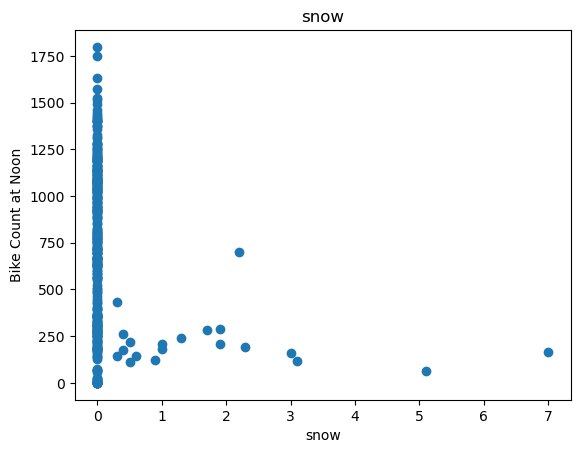

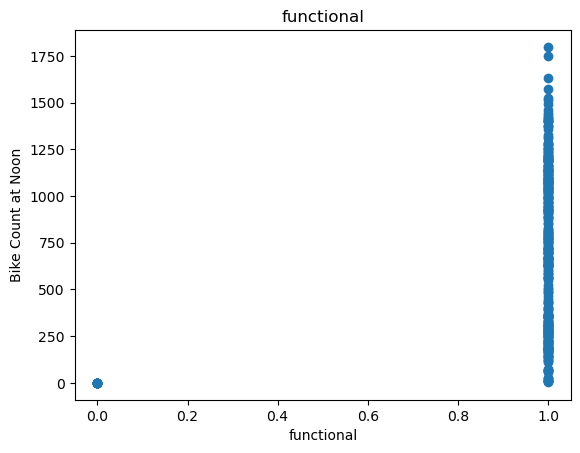

In [13]:
for label in df.columns[1:]:
    plt.scatter(df[label],df["bike_count"])
    plt.title(label)
    plt.ylabel("Bike Count at Noon")
    plt.xlabel(label)
    plt.show()

In [15]:
df = df.drop(["wind","visibility","functional"],axis=1)
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


# Train/valid/test dataset

In [30]:
train,val,test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [31]:
def get_xy(dataframe,y_label,x_labels=None):
    dataframe = copy.deepcopy(dataframe)
    if not x_labels:
        x = dataframe[[c for c in dataframe.columns if c!=y_label]].values
    else:
        if len(x_labels) == 1:
            x =dataframe[x_labels[0]].values.reshape(-1,1)
        else:
            x = dataframe[x_labels].values
        
    y = dataframe[y_label].values.reshape(-1,1)
    data = np.hstack((x,y))
    
    return data , x , y

In [32]:
_,x_train_temp,y_train_temp =get_xy(train,"bike_count",x_labels=["temp"])
_,x_val_temp,y_val_temp =get_xy(val,"bike_count",x_labels=["temp"])
_,x_test_temp,y_test_temp =get_xy(test,"bike_count",x_labels=["temp"])

In [33]:
temp_reg = LinearRegression()
temp_reg.fit(x_train_temp,y_train_temp)

LinearRegression()

In [34]:
print(temp_reg.coef_,temp_reg.intercept_)

[[20.42515954]] [387.60419073]


In [35]:
temp_reg.score(x_test_temp,y_test_temp)

0.31641757749230326

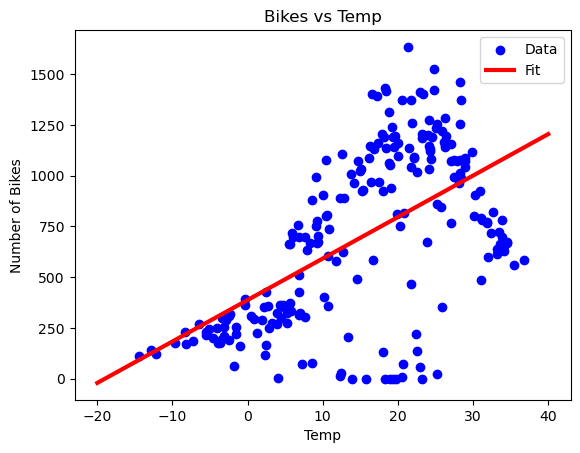

In [36]:
plt.scatter(x_train_temp,y_train_temp,label="Data",color="blue")
x = tf.linspace(-20,40,100)
plt.plot(x,temp_reg.predict(np.array(x).reshape(-1,1)),label="Fit",color="red",linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of Bikes")
plt.xlabel("Temp")
plt.show()

# Multiple Linear Regression

In [37]:
df.columns

Index(['bike_count', 'temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain',
       'snow'],
      dtype='object')

In [38]:
def get_xy(dataframe,y_label,x_labels=None):
    dataframe = copy.deepcopy(dataframe)
    if  x_labels is None:
        x = dataframe[[c for c in dataframe.columns if c!=y_label]].values
    else:
        if len(x_labels) == 1:
            x =dataframe[x_labels[0]].values.reshape(-1,1)
        else:
            x = dataframe[x_labels].values
        
    y = dataframe[y_label].values.reshape(-1,1)
    data = np.hstack((x,y))
    
    return data , x , y

In [39]:
train,val,test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])
_,x_train_all,y_train_all =get_xy(train,"bike_count",x_labels=df.columns[1:])
_,x_val_all,y_val_all =get_xy(val,"bike_count",x_labels=df.columns[1:])
_,x_test_all,y_test_all =get_xy(test,"bike_count",x_labels=df.columns[1:])

In [40]:
all_reg =LinearRegression()
all_reg.fit(x_train_all,y_train_all)

LinearRegression()

In [41]:
all_reg.score(x_test_all,y_test_all)

0.4827093188846052

In [84]:
y_pred_lr = all_reg.predict(x_test_all)
y_pred_lr

array([[ 701.20554955],
       [ 451.35247922],
       [ 401.92321466],
       [1083.13416289],
       [ 521.61308951],
       [ 826.01905306],
       [ 420.3536912 ],
       [ 716.50086603],
       [-116.71966828],
       [ 898.74205086],
       [1086.32095285],
       [ 351.67458333],
       [1002.90859891],
       [ 801.27385639],
       [1146.56391446],
       [1024.66925366],
       [ 605.9278694 ],
       [ 827.65471867],
       [1071.2651805 ],
       [ 972.29545294],
       [ 788.0647884 ],
       [1086.92269926],
       [1098.67453183],
       [  30.08008956],
       [ 697.61841249],
       [ 386.94413375],
       [ 771.62967656],
       [ 494.18655565],
       [ 550.22833458],
       [ 685.27360536],
       [ 498.60416043],
       [1160.88134618],
       [ 854.73560517],
       [ 975.06009514],
       [1021.60953819],
       [1045.7399433 ],
       [ 489.07663335],
       [ 293.93657239],
       [ 793.32846616],
       [ 121.34000953],
       [ 854.58479999],
       [1026.625

# Regression with Neural Net

In [62]:
def plot_loss(history):
    plt.plot(history.history["loss"],label="loss")
    plt.plot(history.history["val_loss"],label="val_loss")
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)
    plt.show()

In [52]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,),axis=None)
temp_normalizer.adapt(x_train_temp.reshape(-1))

c:\Users\benak\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [58]:
# Üsteki kod dizisi artık önerilmiyormuş aşağıdaki gibi yapıldı
input_layer = tf.keras.Input(shape=(1,))
temp_normalizer = tf.keras.layers.Normalization(axis=None)
temp_normalizer.adapt(x_train_temp.reshape(-1))


In [59]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [60]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),loss='mean_squared_error')

In [61]:
history = temp_nn_model.fit(
    x_train_temp.reshape(-1, 1),  # Girişi 2 boyutlu yapıyoruz
    y_train_temp,
    verbose=0,
    epochs=1000,
    validation_data=(x_val_temp.reshape(-1, 1), y_val_temp)  # Doğrulama verisini de düzenliyoruz
)


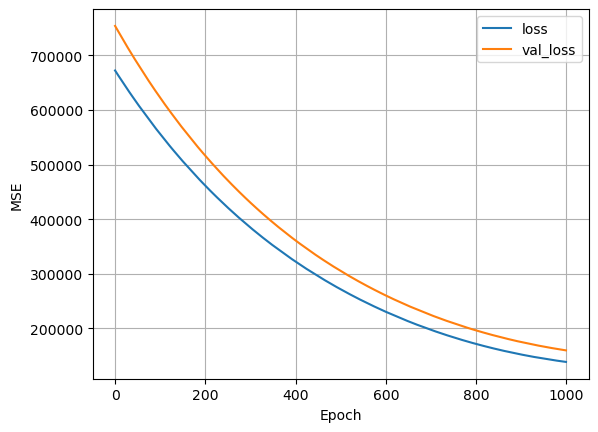

In [63]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


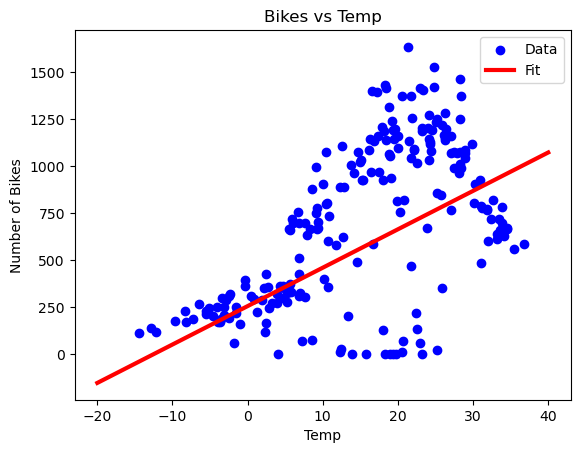

In [64]:
plt.scatter(x_train_temp,y_train_temp,label="Data",color="blue")
x = tf.linspace(-20,40,100)
plt.plot(x,temp_nn_model.predict(np.array(x).reshape(-1,1)),label="Fit",color="red",linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of Bikes")
plt.xlabel("Temp")
plt.show()

# Neural Net

In [68]:
input_layer = tf.keras.Input(shape=(1,))
temp_normalizer = tf.keras.layers.Normalization(axis=None)
temp_normalizer.adapt(x_train_temp.reshape(-1))
nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1,activation='relu')
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='mean_squared_error')

In [69]:
history =nn_model.fit(
    x_train_temp,y_train_temp,
    validation_data = (x_val_temp,y_val_temp),
    epochs=100 #,verbose=0
)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 629013.0625 - val_loss: 755326.5625
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 666301.8750 - val_loss: 755137.1250
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 685690.6875 - val_loss: 754945.0000
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 675543.5000 - val_loss: 754735.6875
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 676637.3750 - val_loss: 754488.6875
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 617466.0625 - val_loss: 754177.9375
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 696271.3750 - val_loss: 753800.0000
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 636120.2500 - val_loss: 753350.9375
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 685879.3750 - val_loss: 752825.6250
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 650925.3750 - val_loss: 752213.1250
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 

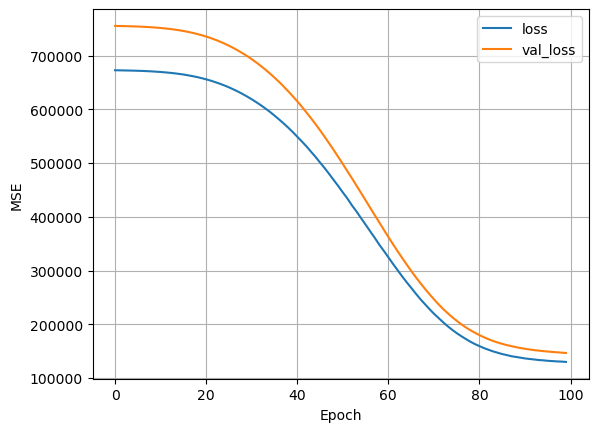

In [ ]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


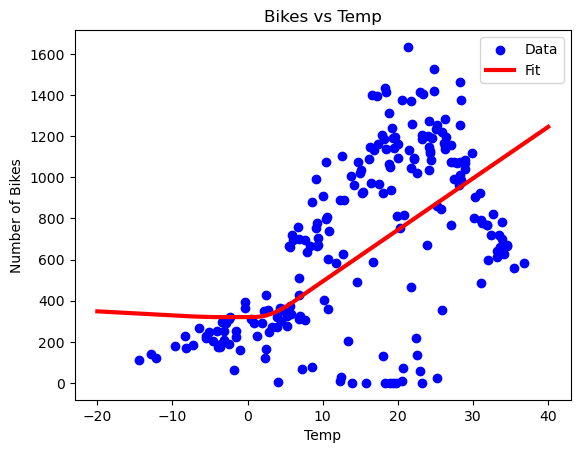

In [ ]:
plt.scatter(x_train_temp,y_train_temp,label="Data",color="blue")
x = tf.linspace(-20,40,100)
plt.plot(x,nn_model.predict(np.array(x).reshape(-1,1)),label="Fit",color="red",linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of Bikes")
plt.xlabel("Temp")
plt.show()

In [73]:
input_layer = tf.keras.Input(shape=(1,))
temp_normalizer = tf.keras.layers.Normalization(axis=None)
temp_normalizer.adapt(x_train_temp.reshape(-1))
nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='mean_squared_error')

In [74]:
history =nn_model.fit(
    x_train_temp,y_train_temp,
    validation_data = (x_val_temp,y_val_temp),
    epochs=100 #,verbose=0
)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 718338.3125 - val_loss: 755340.2500
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 648884.6250 - val_loss: 755170.4375
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 708759.8750 - val_loss: 754979.6875
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 692022.1875 - val_loss: 754748.8125
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 678964.5000 - val_loss: 754439.1875
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 754306.7500 - val_loss: 754036.0625
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 716693.8750 - val_loss: 753517.1250
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 589168.6250 - val_loss: 752839.5625
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 651282.6875 - val_loss: 751953.6875
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 695891.8125 - val_loss: 750788.6250
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 

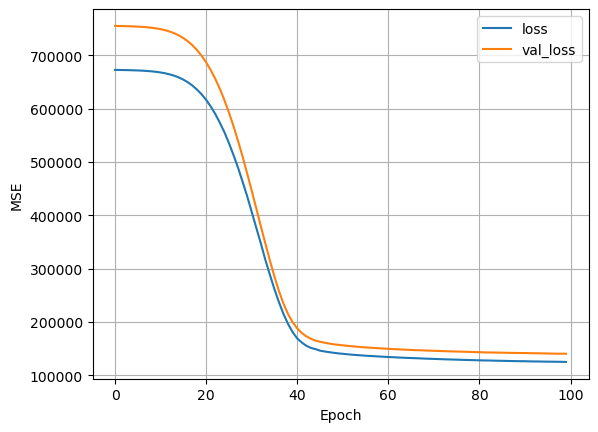

In [75]:
plot_loss(history)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001B030774FE0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step


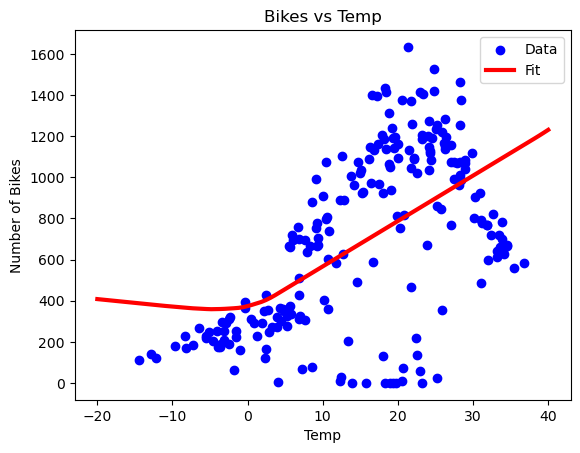

In [76]:
plt.scatter(x_train_temp,y_train_temp,label="Data",color="blue")
x = tf.linspace(-20,40,100)
plt.plot(x,nn_model.predict(np.array(x).reshape(-1,1)),label="Fit",color="red",linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of Bikes")
plt.xlabel("Temp")
plt.show()

In [77]:
input_layer = tf.keras.Input(shape=(6,1))
all_normalizer = tf.keras.layers.Normalization(axis=-1)
all_normalizer.adapt(x_train_all)


In [78]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='mean_squared_error')

In [79]:
history =nn_model.fit(
    x_train_all,y_train_all,
    validation_data = (x_val_all,y_val_all),
    epochs=100 #,verbose=0
)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - loss: 686965.3750 - val_loss: 620855.3125
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 636681.3125 - val_loss: 620557.6875
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 630775.3750 - val_loss: 620236.9375
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 705149.0000 - val_loss: 619881.5625
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 615721.1875 - val_loss: 619479.6250
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 670312.8125 - val_loss: 619018.0625
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 646009.1250 - val_loss: 618478.0000
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 642656.3750 - val_loss: 617831.6875
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 708133.5625 - val_loss: 617047.3750
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 639329.0625 - val_loss: 616132.2500
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 

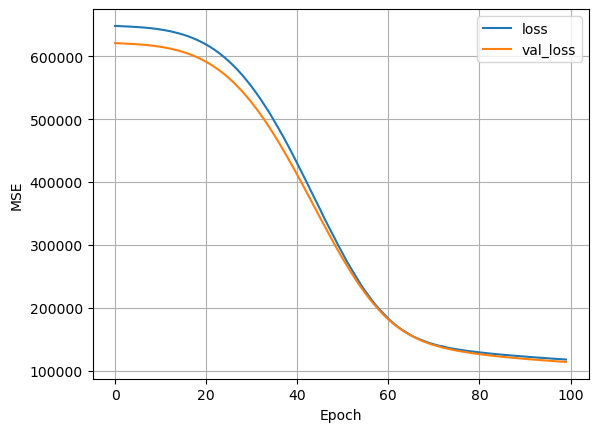

In [80]:
plot_loss(history)

In [85]:
#calculate the MSE for both linear reg and nn
y_pred_lr = all_reg.predict(x_test_all)
y_pred_nn = nn_model.predict(x_test_all)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


In [86]:
def MSE(y_pred,y_real):
    return (np.square(y_pred-y_real)).mean()

In [88]:
MSE(y_pred_lr,y_test_all)

96563.48722402549

In [89]:
MSE(y_pred_nn,y_test_all)

121912.22283925953

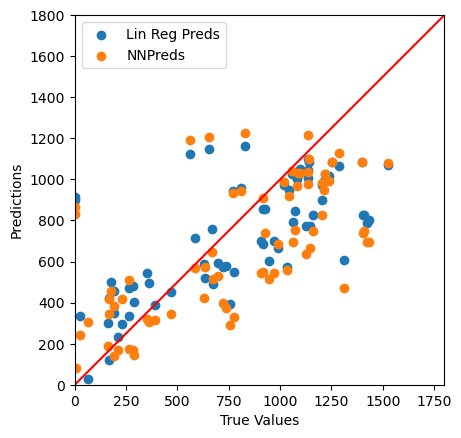

In [91]:
ax = plt.axes(aspect="equal")
plt.scatter(y_test_all,y_pred_lr,label="Lin Reg Preds")
plt.scatter(y_test_all,y_pred_nn,label="NNPreds")
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims=[0,1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims,lims,c="red")